In [1]:
import pandas as pd

In [126]:
# https://github.com/bahar/WorldCityLocations

cities = pd.read_csv(
    "https://github.com/bahar/WorldCityLocations/raw/master/World_Cities_Location_table.csv",
    delimiter=";",
    header=None
).set_axis(
    ["id", "country", "city", "latitude", "longitude", "altitude"], axis=1
).set_index(
    "city", drop=False
)

In [127]:
cities.head()

,id,country,city,latitude,longitude,altitude
city,,,,,,
Kabul,1,Afghanistan,Kabul,34.516667,69.183334,1808.0
Kandahar,2,Afghanistan,Kandahar,31.610000,65.699997,1015.0
Mazar-e Sharif,3,Afghanistan,Mazar-e Sharif,36.706944,67.112221,369.0
Herat,4,Afghanistan,Herat,34.340000,62.189999,927.0
Jalalabad,5,Afghanistan,Jalalabad,34.420000,70.449997,573.0


In [128]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10567 entries, Kabul to Madziwa
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10567 non-null  int64  
 1   country    10567 non-null  object 
 2   city       10563 non-null  object 
 3   latitude   10567 non-null  float64
 4   longitude  10567 non-null  float64
 5   altitude   10567 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 577.9+ KB


In [164]:
lat, lon = cities.loc["Tokyo", ["latitude", "longitude"]]
lat, lon

(35.6895266, 139.6916809)

In [165]:
three_cities = cities.loc[["Tokyo", "Honolulu", "Anchorage"], :]
three_cities

,id,country,city,latitude,longitude,altitude
city,,,,,,
Tokyo,5483,Japan,Tokyo,35.689527,139.691681,40.0
Honolulu,331,United States,Honolulu,21.306944,-157.858337,0.0
Anchorage,354,United States,Anchorage,61.218056,-149.900284,0.0


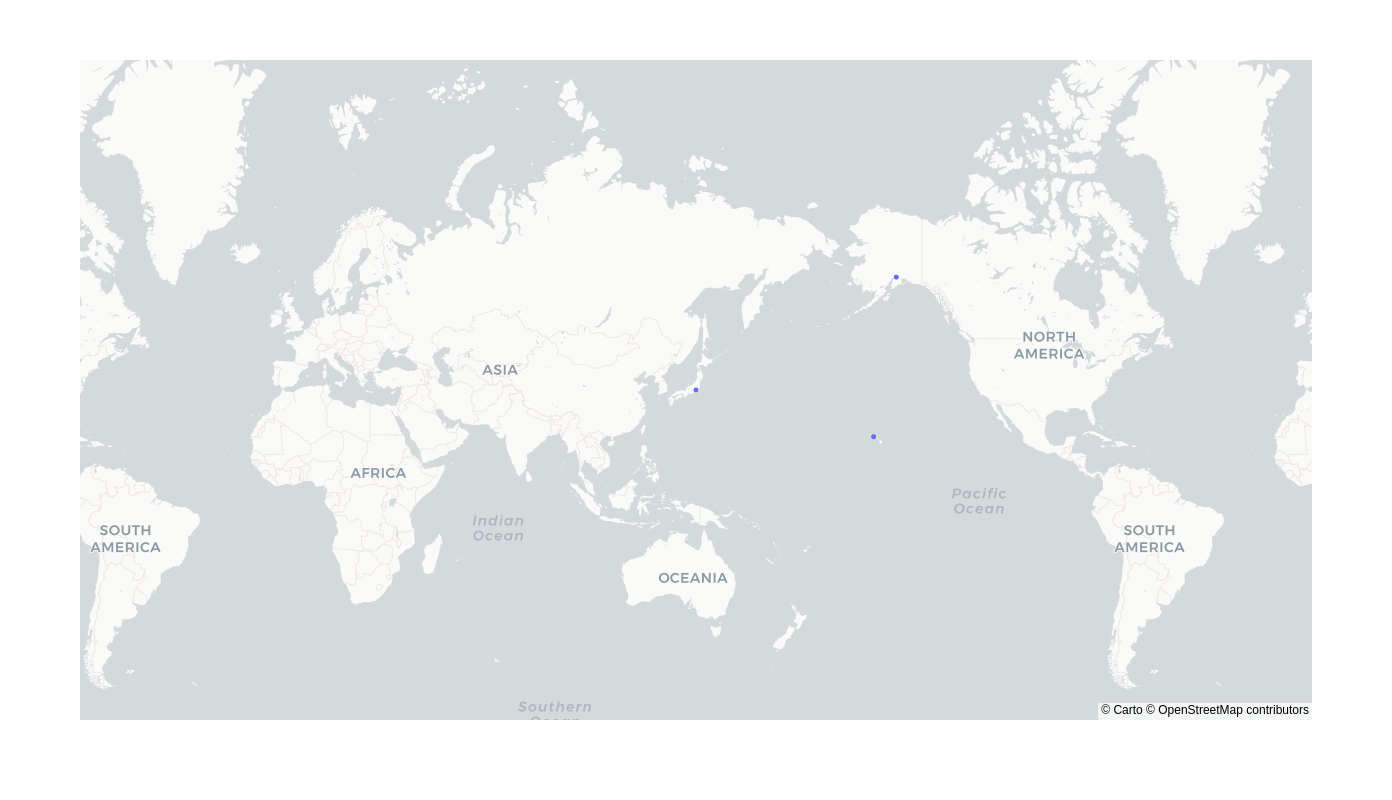

In [166]:
import plotly.express as px

px.scatter_mapbox(
    three_cities,
    lat="latitude",
    lon="longitude",
    hover_name="city",
    hover_data=["country"],
    center={"lat": lat, "lon": lon},
    width=1000,
    height=800,
    zoom=1,
    mapbox_style="carto-positron",
).show()

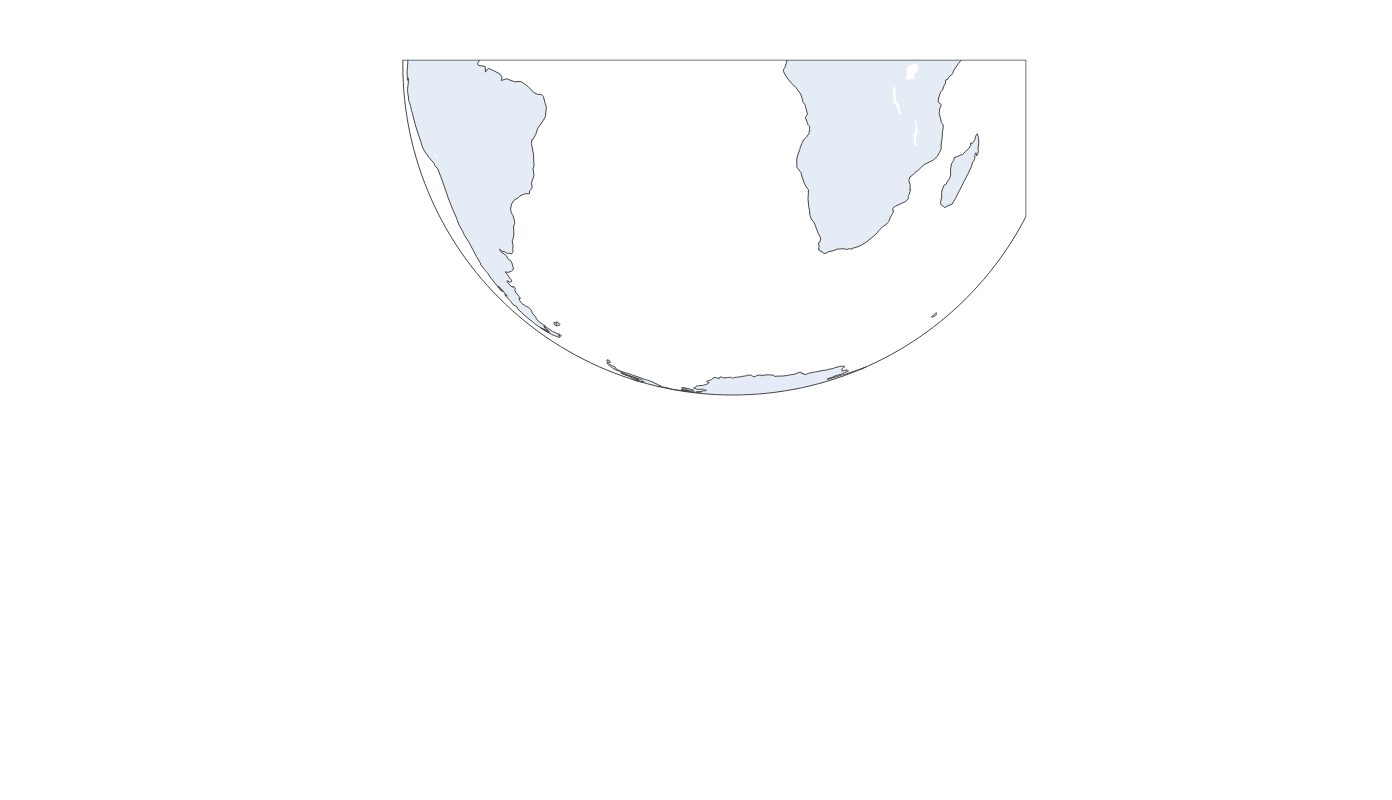

In [169]:
px.line_geo(
    three_cities.loc[["Tokyo", "Anchorage", "Tokyo", "Honolulu"], :],
    lat="latitude",
    lon="longitude",
    hover_name="city",
    hover_data=["country"],
    width=800,
    height=800,
    center={"lat": -100, "lon": 40},
    projection="orthographic"
).show()

In [73]:
from geopy import distance

In [77]:
three_cities

,id,country,city,latitude,longitude,altitude
330,331,United States,Honolulu,21.306944,-157.858337,0.0
353,354,United States,Anchorage,61.218056,-149.900284,0.0
5482,5483,Japan,Tokyo,35.689527,139.691681,40.0


In [78]:
Honolulu, Anchorage, Tokyo = three_cities.loc[:, ["latitude", "longitude"]].values

In [79]:
distance.distance(Tokyo, Honolulu).km

6215.138362382594

In [80]:
distance.distance(Tokyo, Anchorage).km

5574.632960730626

In [83]:
import geopandas

In [115]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).set_index("iso_a3", drop=False)

In [116]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
iso_a3,,,,,,
FJI,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [112]:
aus_grl_ix = world.loc[world.loc[:, "iso_a3"].isin(["AUS", "GRL"]), :].index

In [117]:
world.loc[["AUS", "GRL"], "dummy"] = 10

In [118]:
bounds = world.loc[["AUS", "GRL"], "geometry"].bounds
bounds

,minx,miny,maxx,maxy
iso_a3,,,,
AUS,113.338953,-43.634597,153.569469,-10.668186
GRL,-73.297000,60.036760,-12.208550,83.645130


In [119]:
import numpy as np

x = np.mean((bounds.loc[:, "minx"].min(), bounds.loc[:, "maxx"].max()))
y = np.mean((bounds.loc[:, "miny"].min(), bounds.loc[:, "maxy"].max()))

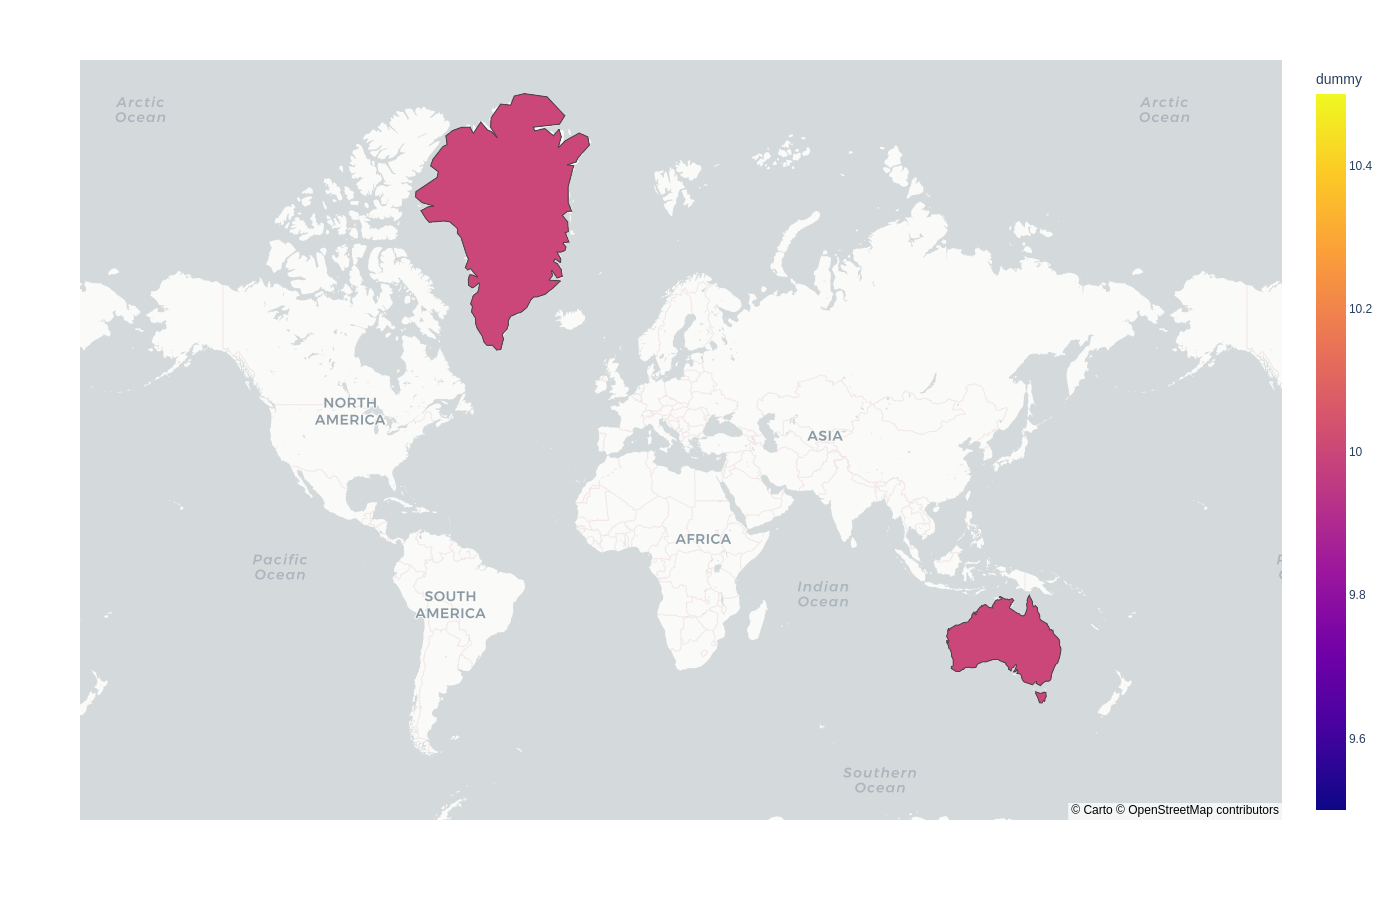

In [120]:
px.choropleth_mapbox(
    world,
    geojson=world,
    locations="iso_a3",
    featureidkey="properties.iso_a3",
    color="dummy",
    center={"lat": x, "lon": y},
    width=1000,
    height=900,
    zoom=1,
    mapbox_style="carto-positron"
).show()

In [16]:
# https://datahub.io/core/geo-countries

# gdf = geopandas.read_file("https://datahub.io/core/geo-countries/r/0.geojson")

In [121]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [125]:
world.loc[["AUS", "GRL"], "geometry"].to_crs({'proj':'cea'}).area / 10 ** 6

iso_a3
AUS    7.687331e+06
GRL    2.207085e+06
dtype: float64